In [1]:
import os
os.chdir('../..')

In [17]:
import comet_ml
from comet_ml.query import Parameter, Metric
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
comet_api = comet_ml.api.API()

In [4]:
exps = comet_api.get('pose-refinement/08-nn-ref-bone-length')

In [14]:
err = [float(exp.get_metrics_summary('R_rel_error')['valueMax']) for exp in exps]
bone_weight = [float(exp.get_parameters_summary('bone_weight')['valueMax']) for exp in exps]
bone_length_weight = [float(exp.get_parameters_summary('bone_length_weight')['valueMax']) for exp in exps]

In [15]:
df = pd.DataFrame({'err': err, 'bone_weight': bone_weight, 'bone_length_weight': bone_length_weight})

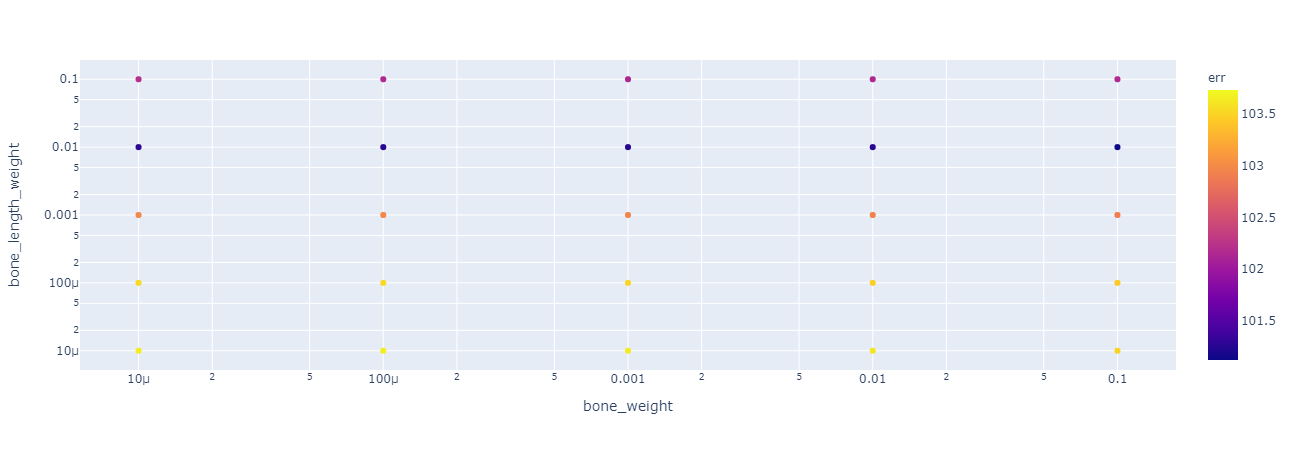

In [29]:
fig = px.scatter(df[(df['bone_length_weight']<1) & (df['bone_weight']<1)], x='bone_weight', y='bone_length_weight', 
     color='err', log_x=True, log_y=True)#, size_max=60) # [(df["n_it"] >= 100) & (df["lr"] < 0.01)]
# fig.write_html(f"{fig_dir}/{m}.html")
fig.show()